# Search for Higgs bosons in the ZZ decay channel in the four muon final state

This week we will look at how the [Higgs boson](https://en.wikipedia.org/wiki/Higgs_boson) was discovered. The data we use here are actual recorded data from the CMS experiment that was used to confirm the existence of the Higgs boson, which then resulted in a Nobel prize. This exercise is based on code available on the CERN Open Data portal<sup>[1]</sup>, and worked to a notebook form by Tom McCauley (University of Notre Dame) and Peitsa Veteli (Helsinki Institute of Physics). Further refinements done for the PAP332 course by Kimmo Kallonen.

[1] http://opendata.cern.ch/record/5500. Jomhari, Nur Zulaiha; Geiser, Achim; Bin Anuar, Afiq Aizuddin; (2017). Higgs-to-four-lepton analysis example using 2011-2012 data. CERN Open Data Portal. DOI:10.7483/OPENDATA.CMS.JKB8.RR42.

The approach we use here is pretty common for experimental particle physics analyses. First, we have a theoretical idea of the contributing background processes. Then we make measurements, and see whether they agree or clash with our assumptions.

Your task list is:

1. Read in the data 

2. Read in the simulated background samples 

3. Stack mass histograms of the simulated backgrounds together

4. Study if the sum of the simulated backgrounds agrees with the measured data

5. If not, try to add a simulated signal sample (in this case, the production and decay of a Higgs boson to ZZ)

6. Study if the signal + background assumption describes the measured data better

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Read in the measured data.

csvs = [pd.read_csv('4mu_2011.csv'), pd.read_csv('4e_2011.csv'), pd.read_csv('2e2mu_2011.csv')]
csvs += [pd.read_csv('4mu_2012.csv'), pd.read_csv('4e_2012.csv'), pd.read_csv('2e2mu_2012.csv')]

fourlep = pd.concat(csvs)

According to the Standard Model of particle physics, one of the ways the Higgs boson can decay into other particles is by first decaying into two Z bosons, which then decay further into a final state with a total of four leptons (restricted to electrons or muons here). It isn't the only process with such a final state, of course, so one has to sift through quite a lot of noise to see the process happening.

Theory doesn't tell us a priori what the mass of the Higgs boson should be exactly. However, experiments and measurements done before the discovery of the boson did restrict its mass to a relatively small range of possible mass values, which could be targeted. We will now investigate this mass range.

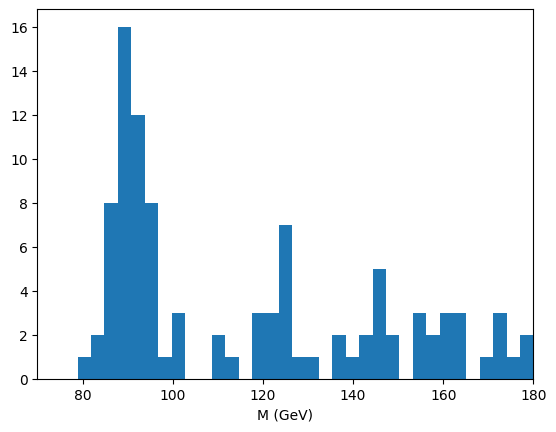

In [3]:
# Consider the mass range from 70 to 180 GeV and plot the masses in the data in a histogram
# Use 37 bins in the histogram, so that the histogram matches with our plots later on
# The invariant mass is already calculated, the variable you need is fourlep.M

plt.figure()
hist, bins, patches = plt.hist(fourlep.M, bins=37, range=[70,180])
plt.xlim([70,180])
plt.xlabel('M (GeV)')
plt.show()

Let's look at some simulations from other processes there. Here are some simulated values for such events that have already been weighted by luminosity, cross-section and number of events. These values are the estimated number of events in one particular mass bin, in the overall range of 70 to 180 GeV. In other words, these values can be put to bar plots with 37 bins to get the corresponding mass histograms.

In [4]:
# Read in the simulated backgrounds and the simulated signal

zz = np.array([0.181215,0.257161,0.44846,0.830071,1.80272,4.57354,13.9677,14.0178,4.10974,1.58934,0.989974,0.839775,0.887188,0.967021,1.07882,1.27942,1.36681,1.4333,1.45141,1.41572,1.51464,1.45026,1.47328,1.42899,1.38757,1.33561,1.3075,1.29831,1.31402,1.30672,1.36442,1.39256,1.43472,1.58321,1.85313,2.19304,2.95083])
dy = np.array([0,0,0,0,0,0.354797,0.177398,2.60481,0,0,0,0,0,0,0,0,0,0.177398,0.177398,0,0.177398,0,0,0,0,0,0,0,0,0,0,0,0.177398,0,0,0,0])
ttbar = np.array([0.00465086,0,0.00465086,0,0,0,0,0,0,0,0.00465086,0,0,0,0,0,0.00465086,0,0,0,0,0.00465086,0.00465086,0,0,0.0139526,0,0,0.00465086,0,0,0,0.00465086,0.00465086,0.0139526,0,0])
hzz = np.array([0.00340992,0.00450225,0.00808944,0.0080008,0.00801578,0.0108945,0.00794274,0.00950757,0.0130648,0.0163568,0.0233832,0.0334813,0.0427229,0.0738129,0.13282,0.256384,0.648352,2.38742,4.87193,0.944299,0.155005,0.0374193,0.0138906,0.00630364,0.00419265,0.00358719,0.00122527,0.000885718,0.000590479,0.000885718,0.000797085,8.86337e-05,0.000501845,8.86337e-05,0.000546162,4.43168e-05,8.86337e-05])


Let's take a look at those numbers and how they contribute to what we'll measure in the detector. Use plt.bar() to plot the different simulated samples. Note: use the given 'x' and 'bin_width' variables to make the histograms look appropriate.

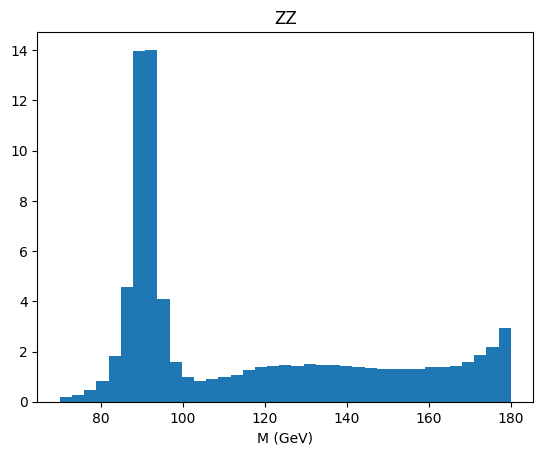

In [5]:
# Plot the mass of the ZZ simulated sample

x = np.linspace(70, 177, 37) # Defining the invariant mass x-axis for the bar plots
bin_width = 2.973 # Give this variable to the 'width' argument of plt.bar() for correct bar thickness

# This is done here just to align the histogram bars properly, since with the default settings plt.bar()
# aligns the bars differently to plt.hist()
x = x + bin_width/2 

plt.figure()
plt.bar(x, zz, width=bin_width)
plt.title('ZZ')
plt.xlabel('M (GeV)')
plt.show()

DY stands for the Drell-Yan process in which two quarks annihilate creating either a virtual photon or a Z boson which then decays into a lepton-antilepton pair.

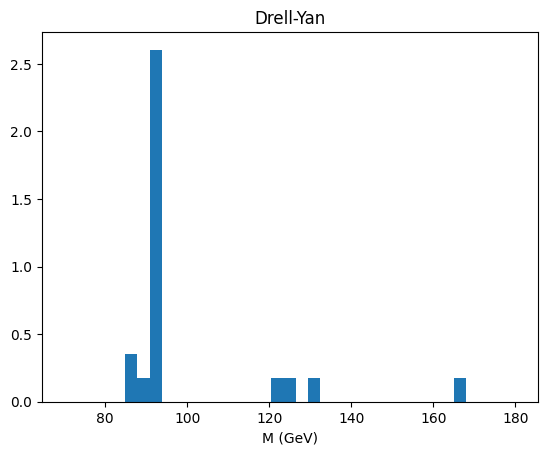

In [6]:
# Plot the mass of the DY simulated sample

plt.figure()
plt.bar(x, dy, width=bin_width)
plt.title('Drell-Yan')
plt.xlabel('M (GeV)')
plt.show()

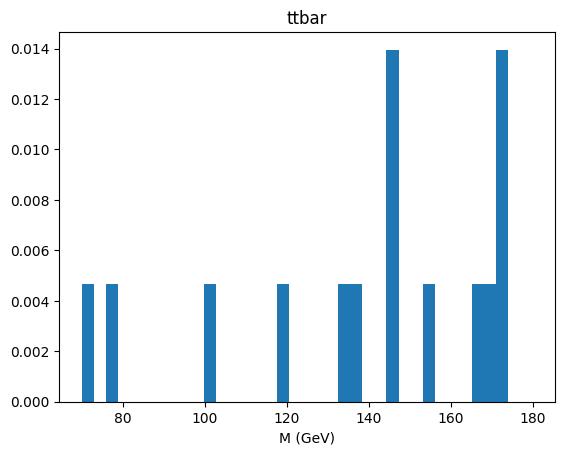

In [7]:
# Plot the mass of the ttbar simulated sample

plt.figure()
plt.bar(x, ttbar, width=bin_width)
plt.title('ttbar')
plt.xlabel('M (GeV)')
plt.show()

Stack now the ZZ, DY and ttbar simulated mass distributions together. This way we get an idea how the total mass distribution should look like, at least based on these simulated samples. Matplotlib's bar() function has an argument called 'bottom', which can be used to stack the bar plots.

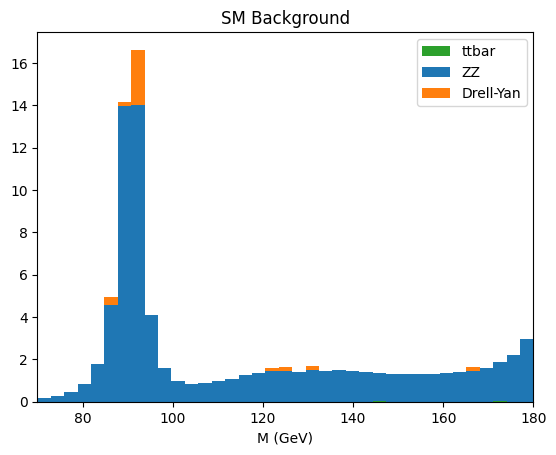

In [8]:
# Stack together the events from the simulated background samples

plt.figure()
plt.bar(x, ttbar, label='ttbar', color='tab:green', width=bin_width)
plt.bar(x, zz, label='ZZ', color='tab:blue', bottom=ttbar, width=bin_width)
plt.bar(x, dy, label='Drell-Yan', color='tab:orange', bottom=zz+ttbar, width=bin_width)
plt.xlim([70,180])
plt.title('SM Background')
plt.xlabel('M (GeV)')
plt.legend()
plt.show()


You should see a peak at around 90 GeV. This is the resonance peak of the Z-boson. ZZ is by far the dominant background, but Drell-Yan is also notable around the Z peak. The ttbar background is hardly relevant here, and its contribution can only be seen in the plot if the y-scale is changed to logarithmic.

Add now the measured data to the plot and compare the stack of the simulated backgrounds to the measured data. Use plt.bar() for the background and plt.hist() for the signal. The bar and hist plots should align properly if you use the previously defined 'x' and 'bin_width' variables for plt.bar(), and 37 bins with the range of 70 to 180 GeV for plt.hist().

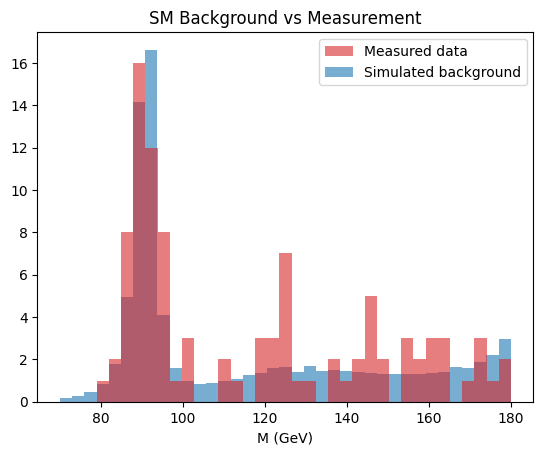

In [9]:
# Plot and compare the total simulated background and the measured data

background = zz + dy + ttbar

plt.bar(x, background, width=bin_width, label='Simulated background', color='tab:blue', alpha=0.6)
plt.hist(fourlep.M, bins=37, range=[70,180], label='Measured data', color='tab:red', alpha=0.6)
plt.legend()
plt.title('SM Background vs Measurement')
plt.xlabel('M (GeV)')
plt.show()


There are discrepancies between the simulation and measured data. This could mean that we are missing a background from our simulation or we could be looking at a signal in our data. Now plot the mass distribution of the Higgs signal. 

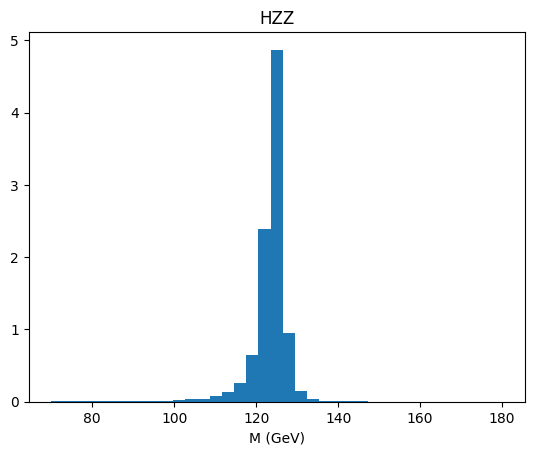

In [10]:
# Plot the mass of the HZZ simulated sample, our theoretical assumption of a Higgs boson production and decay via two Z bosons.

plt.figure()
plt.bar(x, hzz, width=bin_width)
plt.title('HZZ')
plt.xlabel('M (GeV)')
plt.show()

Use now the HZZ simulated signal sample to try out if that describes the data. In other words, plot the HZZ sample on top of the stack of the other background samples, and then compare to the measurement again.

Hint: you can make the plot look clean if you use one color for ZZ+DY+ttbar and another for HZZ, and then for the measured data use the argument histtype='step'.

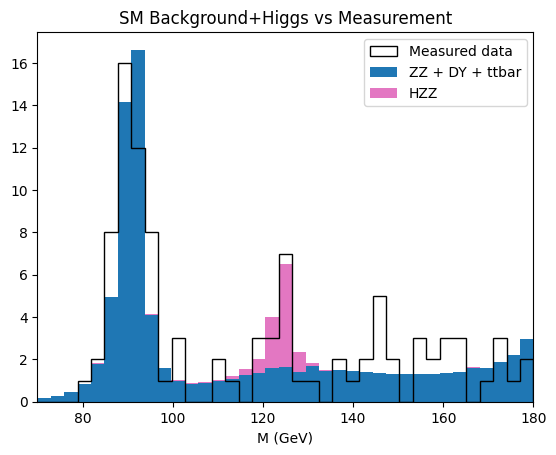

In [11]:
# Compare simulated background+HZZ to measured data

plt.figure()
plt.bar(x, background, label='ZZ + DY + ttbar', color='tab:blue', width=bin_width)
plt.bar(x, hzz, label='HZZ', bottom=background, color='tab:pink', width=bin_width)
plt.hist(fourlep.M, bins=37, range=[70,180], label='Measured data', color='black', histtype='step')
plt.xlim([70,180])
plt.legend()
plt.title('SM Background+Higgs vs Measurement')
plt.xlabel('M (GeV)')
plt.show()


This dataset seems quite small, and by numerical length it is, but it still gives us an enlightening (though extremely simplified) look at how actual experimental particle physics research is done. There aren't too many significant processes that produce four leptons at the end, so getting even this many events comprises about half of the data that is publicly available from the 2011-2012 run. More precise information about the data can be found from [here](http://opendata.cern.ch/record/5500).

As we can see, there is certainly some activity going on in the 125 GeV region. You can compare your results to the famous plot from CMS.

<img src = 'https://cms.cern/sites/cmsexperiment.web.cern.ch/files/styles/large/public/field/image/Fig4-ZZMass_7Plus8TeV_70-180_3GeV.png?itok=g1cCrWTc' align = 'left'>
